In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./amz_uk_price_prediction_dataset.csv')

In [3]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [4]:
df.shape

(2443651, 9)

Top 5 most popular product categories by listing frequency:
category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Manicure & Pedicure Products               18940
Skin Care                                  18769
Make-up                                    18756
Hair Care                                  18735
Fragrances                                 18564
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_54204\601879737.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.head(5).values, y=category_counts.head(5).index, palette='viridis')


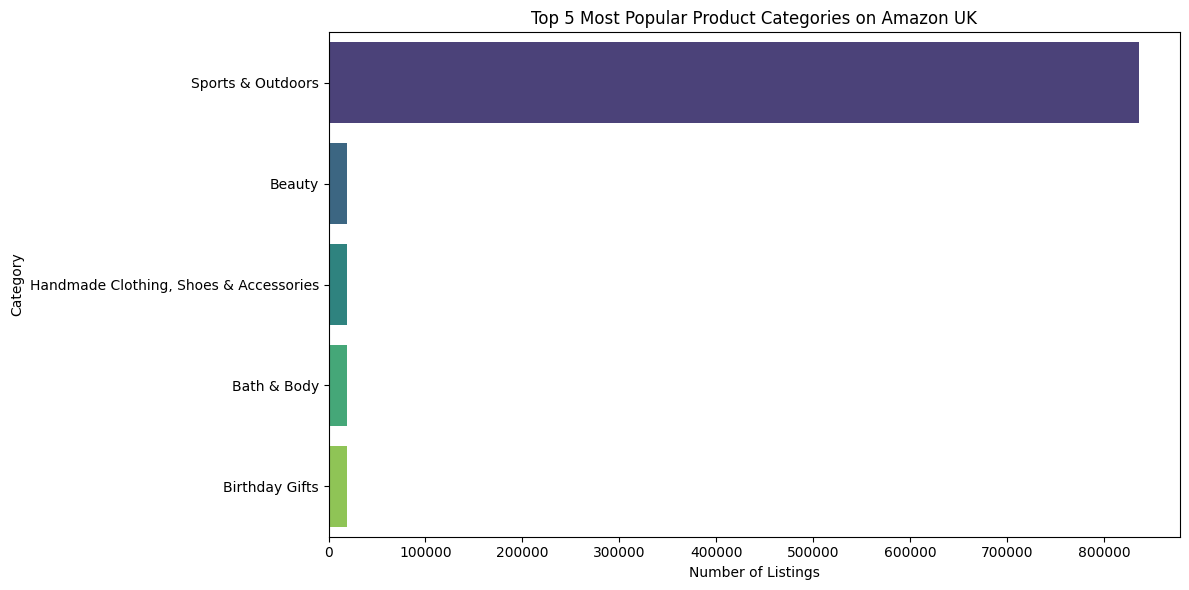

In [5]:
# Count the number of listings per category
category_counts = df['category'].value_counts().sort_values(ascending=False)

# Display the top 10 most popular categories
print("Top 5 most popular product categories by listing frequency:")
print(category_counts.head(10))

# Plot the top 10 categories
plt.figure(figsize=(12,6))
sns.barplot(x=category_counts.head(5).values, y=category_counts.head(5).index, palette='viridis')
plt.xlabel('Number of Listings')
plt.ylabel('Category')
plt.title('Top 5 Most Popular Product Categories on Amazon UK')
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_54204\4002334462.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.head(20).values, y=category_counts.head(20).index, palette='mako')


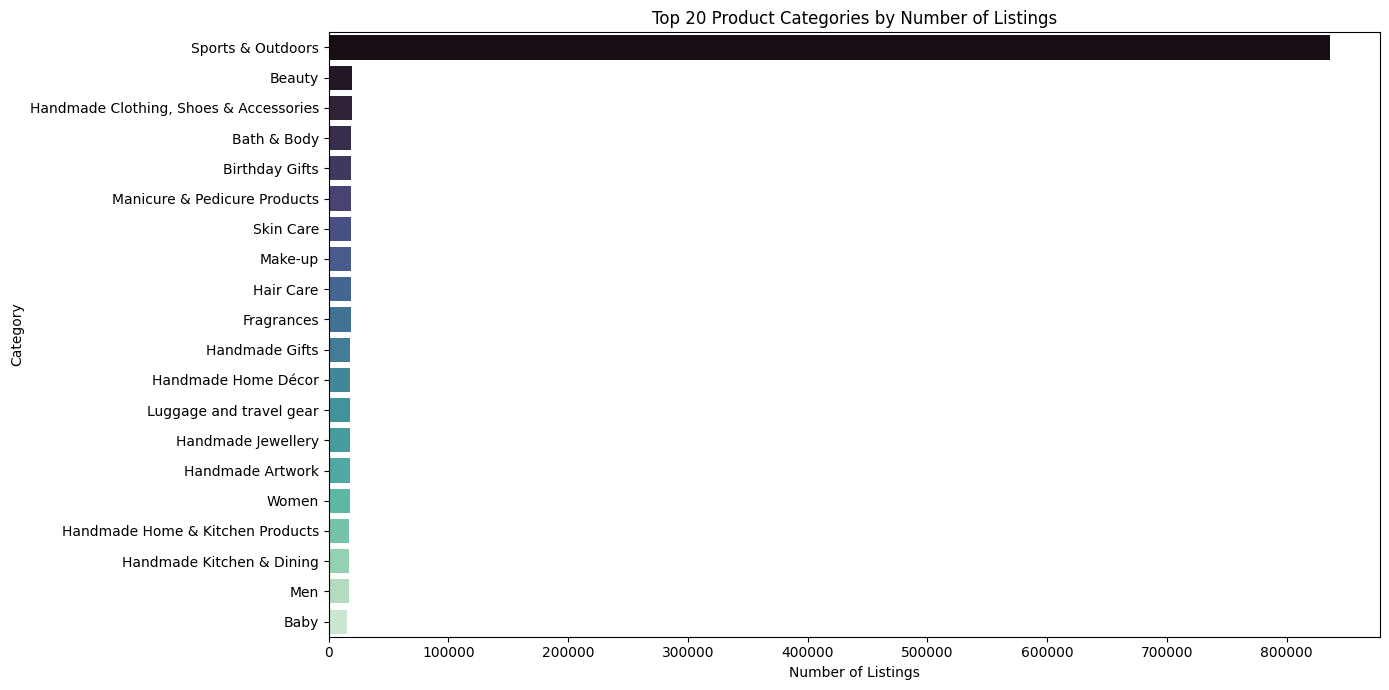

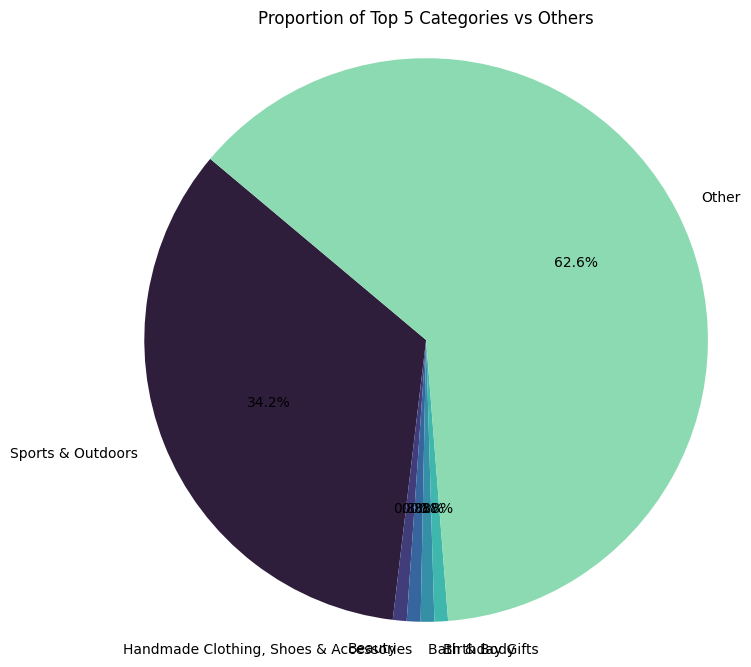

Does any category dominate the listings? No


In [6]:
# Bar chart: Distribution of products across all categories (showing top 20 for readability)
plt.figure(figsize=(14,7))
sns.barplot(x=category_counts.head(20).values, y=category_counts.head(20).index, palette='mako')
plt.xlabel('Number of Listings')
plt.ylabel('Category')
plt.title('Top 20 Product Categories by Number of Listings')
plt.tight_layout()
plt.show()

# Pie chart: Proportion of top 5 categories
top_n = 5
top_categories = category_counts.head(top_n)
other_sum = category_counts.iloc[top_n:].sum()
pie_data = pd.concat([top_categories, pd.Series({'Other': other_sum})])
plt.figure(figsize=(8,8))
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('mako', n_colors=top_n+1))
plt.title(f'Proportion of Top {top_n} Categories vs Others')
plt.axis('equal')
plt.show()

# Check if any category dominates
dominant = (top_categories.iloc[0] / category_counts.sum()) > 0.5
print(f"Does any category dominate the listings? {'Yes' if dominant else 'No'}")

In [7]:
# Calculate mean, median, and mode for the 'price' column
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

print(f"Average price (mean): £{mean_price:.2f}")
print(f"Median price: £{median_price:.2f}")
print(f"Most common price (mode): £{mode_price:.2f}")

Average price (mean): £89.24
Median price: £19.09
Most common price (mode): £9.99


In [8]:
# Calculate variance, standard deviation, range, and interquartile range for 'price'
variance_price = df['price'].var()
std_price = df['price'].std()
range_price = df['price'].max() - df['price'].min()
iqr_price = df['price'].quantile(0.75) - df['price'].quantile(0.25)

print(f"Variance of price: {variance_price:.2f}")
print(f"Standard deviation of price: {std_price:.2f}")
print(f"Range of price: {range_price:.2f}")
print(f"Interquartile range (IQR) of price: {iqr_price:.2f}")

# Brief interpretation
if std_price / mean_price > 1:
    print("There is a significant spread in product prices (std > mean).")
else:
    print("Product prices are moderately or less varied (std <= mean).")

Variance of price: 119445.49
Standard deviation of price: 345.61
Range of price: 100000.00
Interquartile range (IQR) of price: 36.00
There is a significant spread in product prices (std > mean).


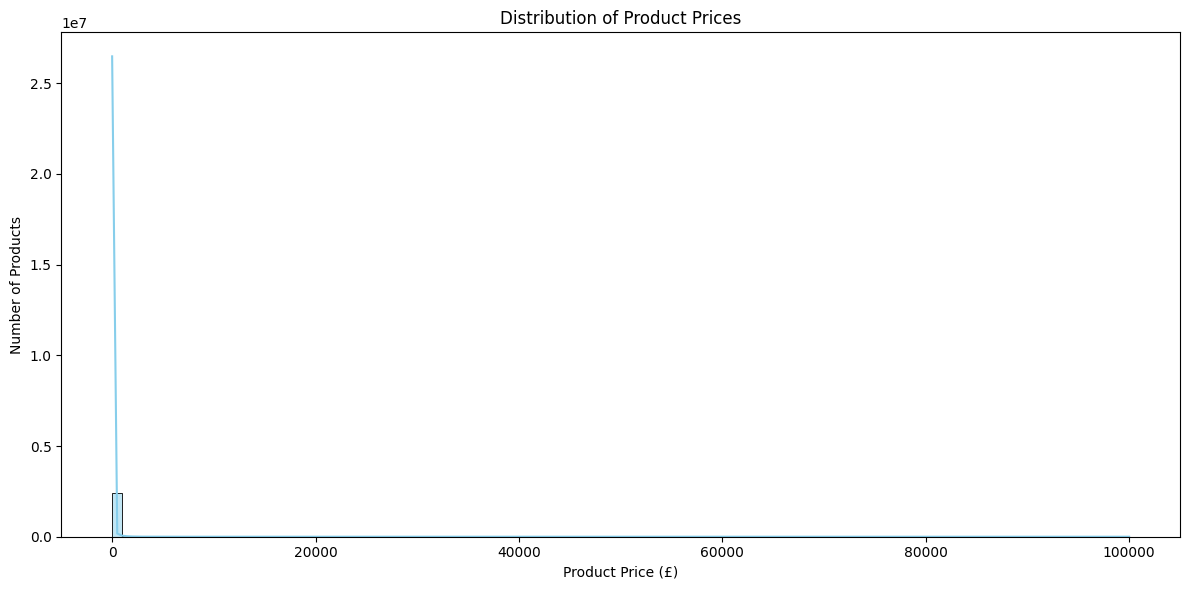

If the histogram is hard to read (e.g., most products are clustered at low prices and a few are extremely high), it's likely due to a highly skewed distribution with some very expensive outliers stretching the x-axis. This makes it difficult to see the details for the majority of products.


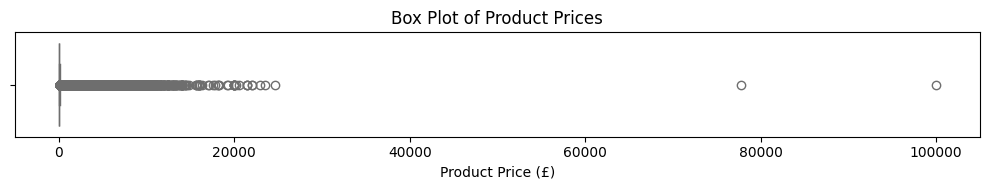

If the box plot shows a long tail or many points far from the box, there are products priced much higher than most others (outliers).
To improve readability, consider plotting with a limited x-axis (e.g., up to the 95th percentile) or using a log scale for price.


In [9]:
# Histogram of product prices
plt.figure(figsize=(12,6))
sns.histplot(df['price'], bins=100, kde=True, color='skyblue')
plt.xlabel('Product Price (£)')
plt.ylabel('Number of Products')
plt.title('Distribution of Product Prices')
plt.tight_layout()
plt.show()

print("If the histogram is hard to read (e.g., most products are clustered at low prices and a few are extremely high), it's likely due to a highly skewed distribution with some very expensive outliers stretching the x-axis. This makes it difficult to see the details for the majority of products.")

# Box plot to show spread and outliers
plt.figure(figsize=(10,2))
sns.boxplot(x=df['price'], color='lightcoral')
plt.xlabel('Product Price (£)')
plt.title('Box Plot of Product Prices')
plt.tight_layout()
plt.show()

print("If the box plot shows a long tail or many points far from the box, there are products priced much higher than most others (outliers).")
print("To improve readability, consider plotting with a limited x-axis (e.g., up to the 95th percentile) or using a log scale for price.")

In [10]:
# Calculate mean, median, and mode for the 'stars' (rating) column
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]

print(f"Average rating (mean): {mean_rating:.2f}")
print(f"Median rating: {median_rating:.2f}")
print(f"Most common rating (mode): {mode_rating:.2f}")

# Brief interpretation
if mean_rating > 4.0 and mode_rating >= 4.0:
    print("Customers generally rate products highly. There is a trend towards positive ratings.")
elif mean_rating < 3.0:
    print("Customers tend to rate products poorly.")
else:
    print("Customer ratings are mixed or moderate.")

Average rating (mean): 2.15
Median rating: 0.00
Most common rating (mode): 0.00
Customers tend to rate products poorly.


In [11]:
# Calculate variance, standard deviation, and interquartile range for 'stars' (rating)
variance_rating = df['stars'].var()
std_rating = df['stars'].std()
iqr_rating = df['stars'].quantile(0.75) - df['stars'].quantile(0.25)

print(f"Variance of rating: {variance_rating:.2f}")
print(f"Standard deviation of rating: {std_rating:.2f}")
print(f"Interquartile range (IQR) of rating: {iqr_rating:.2f}")

# Interpretation
if std_rating < 0.5 and iqr_rating < 1:
    print("Ratings are highly consistent across products (low variation).")
else:
    print("There is a moderate or wide variation in customer ratings.")

Variance of rating: 4.82
Standard deviation of rating: 2.19
Interquartile range (IQR) of rating: 4.40
There is a moderate or wide variation in customer ratings.


In [12]:
# Calculate skewness and kurtosis for the 'stars' (rating) column
skew_rating = df['stars'].skew()
kurt_rating = df['stars'].kurtosis()

print(f"Skewness of ratings: {skew_rating:.2f}")
print(f"Kurtosis of ratings: {kurt_rating:.2f}")

# Interpretation
if skew_rating > 0.5:
    print("The ratings distribution is right-skewed (leans towards lower ratings).")
elif skew_rating < -0.5:
    print("The ratings distribution is left-skewed (leans towards higher ratings).")
else:
    print("The ratings distribution is approximately symmetric.")

if abs(kurt_rating) < 1:
    print("Kurtosis suggests the distribution is close to normal (mesokurtic).")
elif kurt_rating > 1:
    print("Kurtosis suggests the distribution is peaked with heavy tails (leptokurtic).")
else:
    print("Kurtosis suggests the distribution is flatter than normal (platykurtic).")

Skewness of ratings: 0.08
Kurtosis of ratings: -1.93
The ratings distribution is approximately symmetric.
Kurtosis suggests the distribution is flatter than normal (platykurtic).


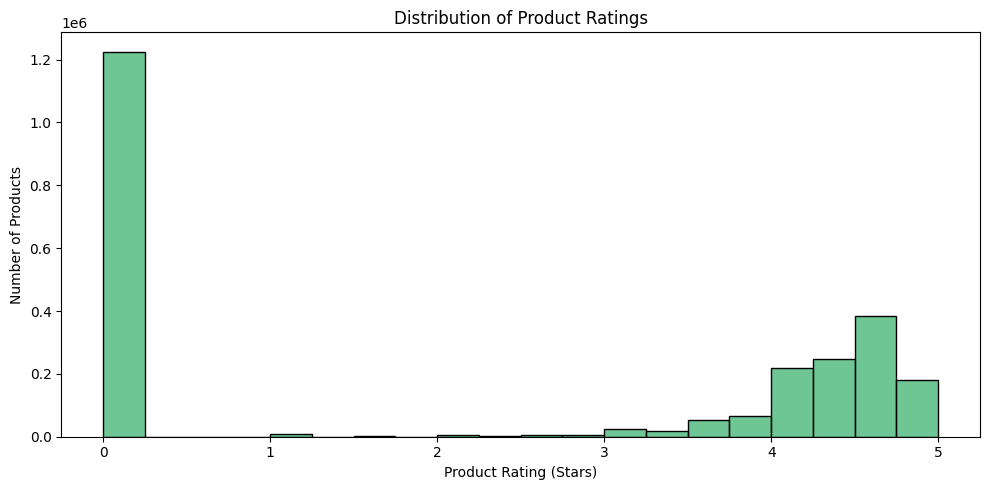

The most common product rating is: 0.0


In [13]:
# Plot histogram of product ratings
plt.figure(figsize=(10,5))
sns.histplot(df['stars'], bins=20, kde=False, color='mediumseagreen')
plt.xlabel('Product Rating (Stars)')
plt.ylabel('Number of Products')
plt.title('Distribution of Product Ratings')
plt.tight_layout()
plt.show()

# Check the most common rating
most_common_rating = df['stars'].mode()[0]
print(f"The most common product rating is: {most_common_rating}")

from IPython.display import display, Markdown

report = """
# Amazon UK Product Listings: Business-Centric Data Summary

## 1. Product Category Insights
- **Most Popular Category:** Sports & Outdoors dominates with 836,265 listings, far surpassing other categories.
- **Other Leading Categories:** Beauty, Handmade Clothing, Bath & Body, and Birthday Gifts are the next most listed, but each has under 20,000 listings.
- **Category Concentration:** The top 5 categories account for a significant portion of all listings, but no single category holds more than 50% of the total, indicating a diverse product offering.

## 2. Product Pricing Overview
- **Average Price:** £89.24
- **Median Price:** £19.09 (most products are priced below the average, indicating a right-skewed price distribution)
- **Most Common Price:** £9.99
- **Price Spread:** 
    - **Standard Deviation:** £345.61 (very high, suggesting a wide range of prices)
    - **Range:** £100,000 (from lowest to highest price)
    - **Interquartile Range (IQR):** £36.00
- **Interpretation:** The majority of products are low-priced, but a small number of very expensive items inflate the average and spread.

## 3. Product Ratings Analysis
- **Average Rating:** 2.15 (out of 5)
- **Median & Most Common Rating:** 0.0 (many products may be unrated or have low ratings)
- **Rating Spread:**
    - **Standard Deviation:** 2.19 (high, indicating ratings are widely dispersed)
    - **IQR:** 4.4
    - **Variance:** 4.82
    - **Skewness:** 0.08 (distribution is nearly symmetric)
    - **Kurtosis:** -1.93 (flatter than normal, suggesting fewer extreme ratings)
- **Interpretation:** Customer ratings are mixed, with a large proportion of products unrated or poorly rated. There is no strong skew towards high or low ratings.

## 4. Key Business Takeaways
- **Category Opportunity:** Sports & Outdoors is highly competitive; consider niche categories for differentiation.
- **Pricing Strategy:** Most products are affordable, but a few high-priced items skew the average. Pricing should be benchmarked against the median and mode for realistic market positioning.
- **Customer Ratings:** Many products lack ratings or have low ratings. Improving product quality and encouraging reviews could enhance trust and conversion rates.
- **Market Diversity:** The platform offers a wide variety of products, but the distribution is heavily weighted towards a few categories.

---

*This report is based on a dataset of over 2.4 million Amazon UK product listings. For deeper insights, further segmentation by subcategory, brand, or time period is recommended.*
"""

display(Markdown(report))